# Visualization - wordcloud, folium

## wordcloud
- 텍스트 데이터 내에서 자주 등장하는 단어들을 시각적으로 표현하는 그래픽
- 주로 문서, 스피치, 블로그 글 등의 텍스트 데이터를 분석할 때 사용
- 단어의 빈도수에 따라 단어의 크기가 다르게 표시되며, 높은 빈도수를 가진 단어일수록 더 크고 눈에 띄게 표시
- 텍스트 데이터의 핵심 키워드나 주제를 한눈에 파악하는 데 유용

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install konlpy
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 7s (1,403 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120899 files and dire

In [ ]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()

[f for f in sys_font if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo-YetHangul.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquare_acEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
from bs4 import BeautifulSoup
import re
import requests
from wordcloud import WordCloud

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] =False
%matplotlib inline

In [ ]:
url = 'https://www.ajunews.com/view/20200107170358219'
resp = requests.get(url)

soup = BeautifulSoup(resp.text)
article = soup.find('div', id='articleBody').get_text()
article

"\n비플라이소프트가 고려대학교 산업경영공학부의 강필성 교수를 최고기술경영자(CTO)로 영입했다고 3일 밝혔다. 이번 강필성 교수 영입은 인공지능 및 머신러닝 분야의 기술 강화를 위한 활동의 일환이다.\n\r\n강 교수는 서울대학교 산업공학과에서 박사학위를 취득한 후 현대카드의 고객가치경영(CVM Customer Value Management) 기획팀으로 업계에 입문했다. 이후 서울과학기술대학교 글로벌융합산업공학과를 거쳐 고려대학교 산업공학과에서 데이터 사이언스 및 비즈니스 애널리틱스 연구실을 이끌며 인공지능과 머신러닝분야에서 삼성전자, NC소프트 등과 함께 일해 왔다.\n\r\n한국언론진흥재단의 뉴스저작권 공식 유통사이자 미디어빅데이터 정보와 AI 기술을 통해 새로운 가치를 창출하기 위해 노력하고 있는 비플라이소프트는 지난해 AI 기술 기업인 위고(구 유비원)을 인수하고 미디어빅데이터와 AI를 접목한 모니터링 플랫폼 위고몬 등 다양한 서비스를 준비하고 있다. 또한 ‘로제우스 미디어 얼라이언스 그룹’과 함께 비플라이소프트가 지난 15년 동안 확보한 수백억 개의 빅데이터를 기반으로 AI, 블록체인 기술을 결합, 뉴스 콘텐츠 유통 플랫폼을 구축하는 ‘로제우스’ 프로젝트에도 참여 중이다.\n\r\n비플라이소프트의 CTO로 취임한 강필성 교수는 “오랜 시간 동안 미디어 분야에서 활약한 비플라이소프트와 함께 일하게 되어 감사하다”며 “앞으로 인공지능과 머신러닝으로 미디어빅데이터를 보다 의미있고 가치있게 활용하는 길을 모색하고 실현하는 데 최선을 다하겠다”고 포부를 밝혔다.\n\n관련기사뜨거운 이전상장 1000대1 경쟁률… 혹한기 IPO 무색코넥스, 증권가 '찬밥신세'… 보고서 있는 기업은 단 1곳 \r\n비플라이소프트의 임경환 대표는 이와 관련, “강필성 교수는 산업 현장에서 벌어지는 다양한 문제들을 해결해오면서 인공지능과 머신러닝 분야에 굵직한 성과를 만들어 왔다”며 “강 교수의 탁월한 역량과 비플라이소프트의 가능성이 함께 어우러지면 주목할만한 성과를 가져올 것”이라

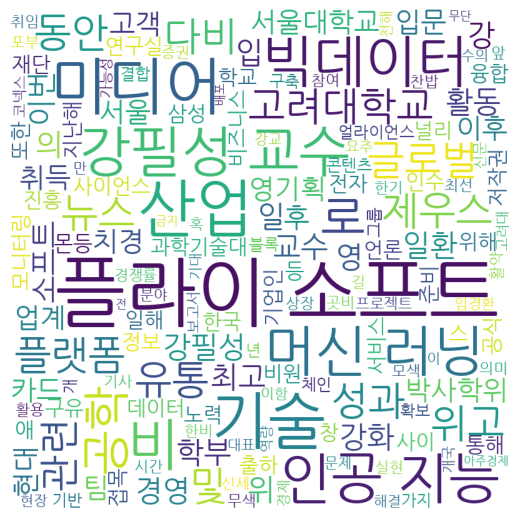

In [ ]:
from wordcloud import WordCloud
from wordcloud.wordcloud import FONT_PATH
from konlpy.tag import Okt
import re

p = re.compile('[\Wa-zA-Z0-9_]+')
article = re.sub(p, '', article)

okt = Okt()
morphs = okt.pos(article)
words = [word for word, pos in morphs if pos == 'Noun']
text = ' '.join(words)

FONT_PATH = path

# 워드클라우드 생성
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10,
                font_path=FONT_PATH).generate(text)

# 워드클라우드 표시
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

---

## 지도 시각화
- Python을 사용하여 지리적 데이터를 시각화하는 라이브러리
- 대화형 지도를 생성하고, 이에 다양한 특성과 스타일을 추가하는 기능을 제공
- 간단한 명령어로 지도에 마커, 라인, 도형 등을 추가할 수 있으며, 이를 통해 데이터를 지리적으로 표현하는 데 유용

[Document](https://python-visualization.github.io/folium/latest/)

In [ ]:
!pip3 install folium

In [ ]:
import pandas as pd
import folium
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
map_kor = folium.Map(location=[37.5665, 126.9780], zoom_start=6)

folium.Marker([37.5900677, 127.0323486],
              popup= '<div style="width:100px">고려대학교<br>\
              <img width="80px" src="https://search1.kakaocdn.net/argon/229x0_80_wr/FLMCI21NSIJ"><br>\
              <a href="https://www.korea.ac.kr/mbshome/mbs/university/index.do">홈페이지</a></div>',
              tooltip = 'click',
              icon=folium.Icon(color='#ff0000', icon='info-sign')).add_to(map_kor)

map_kor.save('kor.html')
map_kor

---